# 주제 : 롤 좀 하니? '이것'만 하면 무조건 이긴다!<br> - 데이터로 알아보는 리그 오브 레전드의 승리 공식
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 League of Legends Diamond Ranked Games (10 min) 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    high_diamond_ranked_10min.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gameId: 게임 판의 고유 ID
    blueWins: 블루팀의 승리 여부 (0: 패배, 1: 승리)
    xxxWardsPlaced: xxx팀에서 설치한 와드의 수 
    xxxWardsDestroyed: xxx팀에서 파괴한 와드의 수
    xxxFirstBlood: xxx팀의 첫번째 킬 달성 여부
    xxxKills: xxx팀의 킬 수
    xxxDeaths: xxx팀의 죽음 수
    xxxAssists: xxx팀의 어시스트 수
    xxxEliteMonsters: xxx팀이 죽인 엘리트 몬스터 수
    xxxDragons: xxx팀이 죽인 용의 수
    xxxHeralds: xxx팀이 죽인 전령의 수
    xxxTowersDestroyed: xxx팀이 파괴한 탑의 수
    xxxTotalGold: xxx팀의 전체 획득 골드
    xxxAvgLevel: xxx팀의 평균 레벨
    xxxTotalExperience: xxx팀의 총 경험치 획득량
    xxxTotalMinionsKilled: xxx팀의 총 미니언 킬 수
    xxxTotalJungleMinionsKilled: xxx팀의 총 정글 미니언 킬 수
    xxxGoldDiff: xxx팀과 다른 팀 간의 골드 획득량 차이
    xxxExperienceDiff: xxx팀과 다른 팀과의 경험치 획득량 차이
    xxxCSPerMin: xxx팀의 분당 CS 스코어
    xxxGoldPerMin: xxx팀의 분당 골드 획득량
      
    
    
- 데이터 출처: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

## 최종 목표
    - 일상에서 볼 수 있는 데이터의 활용
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - 학습된 모델로부터 인사이트 습득 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 리그 오브 레전드 데이터셋

### E-스포츠와 리그 오브 레전드


### 리그 오브 레전드 데이터셋에 관하여


## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [ ]:
import os

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] ='smaug4474'

os.environ['KAGGLE_KEY'] ='29323d66c143c7d1ba634a38204b8c65'




### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d bobbyscience/league-of-legends-diamond-ranked-games-10-min
!unzip '*.zip'



  0% 0.00/539k [00:00<?, ?B/s]
100% 539k/539k [00:00<00:00, 99.4MB/s]
Archive:  league-of-legends-diamond-ranked-games-10-min.zip
  inflating: high_diamond_ranked_10min.csv  


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('/content/high_diamond_ranked_10min.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head(10)


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

### 문제 5. 각 컬럼의 Correlation 히트맵으로 시각화하기


In [ ]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [ ]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
blue_corr=df[['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin']].corr(method='pearson')
blue_corr       

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
blueWins,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,0.092385,0.115566,0.417213,0.357820,0.396141,0.224909,0.131445,0.511119,0.489558,0.224909,0.417213
blueWardsPlaced,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,0.009462,0.019725,0.034349,0.031719,-0.033925,0.010501,0.015800,0.027943,-0.033925,0.019725
blueWardsDestroyed,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,-0.009150,0.060054,0.060294,0.067462,0.111028,-0.023452,0.078585,0.077946,0.111028,0.060054
blueFirstBlood,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,0.083316,0.312058,0.177617,0.190365,0.125642,0.018190,0.378511,0.240665,0.125642,0.312058
blueKills,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,0.180314,0.888751,0.434867,0.472155,-0.030880,-0.112506,0.654148,0.583730,-0.030880,0.888751
blueDeaths,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,-0.071441,-0.162572,-0.414755,-0.460122,-0.468560,-0.228102,-0.640000,-0.577613,-0.468560,-0.162572
blueAssists,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,0.123663,0.748352,0.292661,0.303022,-0.062035,-0.134023,0.549761,0.437002,-0.062035,0.748352
blueEliteMonsters,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,0.166644,0.239396,0.203530,0.232774,0.118762,0.198378,0.281464,0.263991,0.118762,0.239396
blueDragons,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,0.020381,0.039750,0.186413,0.160683,0.179083,0.086686,0.159595,0.233875,0.211496,0.086686,0.186413
blueHeralds,0.092385,0.010104,0.016940,0.077509,0.076195,-0.095527,0.028434,0.640271,0.020381,1.000000,0.217901,0.153974,0.128201,0.152386,0.083509,0.121291,0.162943,0.162496,0.083509,0.153974


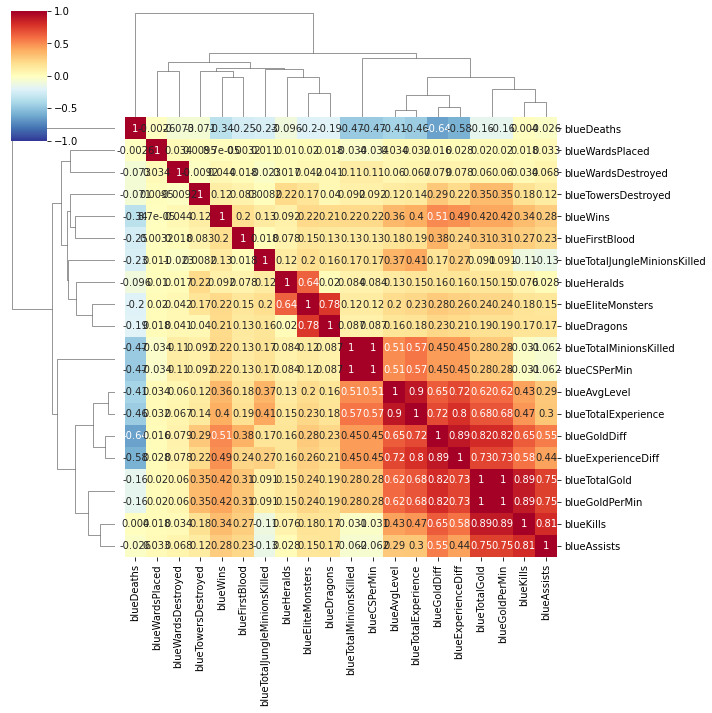

In [ ]:
sns.clustermap(blue_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [ ]:
red_corr=df[['blueWins','redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']].corr(method='pearson')
red_corr

,blueWins,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
blueWins,1.000000,-0.023671,-0.055400,-0.201769,-0.339297,0.337358,-0.271047,-0.221551,-0.209516,-0.097172,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
redWardsPlaced,-0.023671,1.000000,0.019784,0.019142,0.008102,-0.034239,0.023791,0.027452,0.018717,0.021769,-0.006230,0.010666,0.041737,0.036506,-0.021842,0.004666,0.019042,0.026556,-0.021842,0.010666
redWardsDestroyed,-0.055400,0.019784,1.000000,0.043304,0.038672,-0.092278,0.055798,0.039335,0.046132,0.005255,0.003855,0.070784,0.075537,0.079975,0.128062,-0.009313,0.099725,0.085829,0.128062,0.070784
redFirstBlood,-0.201769,0.019142,0.043304,1.000000,0.247929,-0.269425,0.201140,0.141627,0.135327,0.060246,0.069584,0.301479,0.182602,0.194920,0.156711,0.024559,0.378511,0.240665,0.156711,0.301479
redKills,-0.339297,0.008102,0.038672,0.247929,1.000000,0.004044,0.804023,0.163340,0.150746,0.076639,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
redDeaths,0.337358,-0.034239,-0.092278,-0.269425,0.004044,1.000000,-0.020344,-0.224564,-0.207949,-0.104423,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
redAssists,-0.271047,0.023791,0.055798,0.201140,0.804023,-0.020344,1.000000,0.129698,0.142671,0.030000,0.107425,0.736215,0.277040,0.279788,-0.078234,-0.130417,0.528081,0.422972,-0.078234,0.736215
redEliteMonsters,-0.221551,0.027452,0.039335,0.141627,0.163340,-0.224564,0.129698,1.000000,0.811234,0.619153,0.158999,0.228861,0.222537,0.244205,0.129705,0.216969,0.281296,0.269283,0.129705,0.228861
redDragons,-0.209516,0.018717,0.046132,0.135327,0.150746,-0.207949,0.142671,0.811234,1.000000,0.043114,0.026950,0.178168,0.191497,0.204941,0.103151,0.214187,0.234566,0.218872,0.103151,0.178168
redHeralds,-0.097172,0.021769,0.005255,0.060246,0.076639,-0.104423,0.030000,0.619153,0.043114,1.000000,0.235475,0.151762,0.123056,0.142024,0.083087,0.083068,0.165611,0.166162,0.083087,0.151762


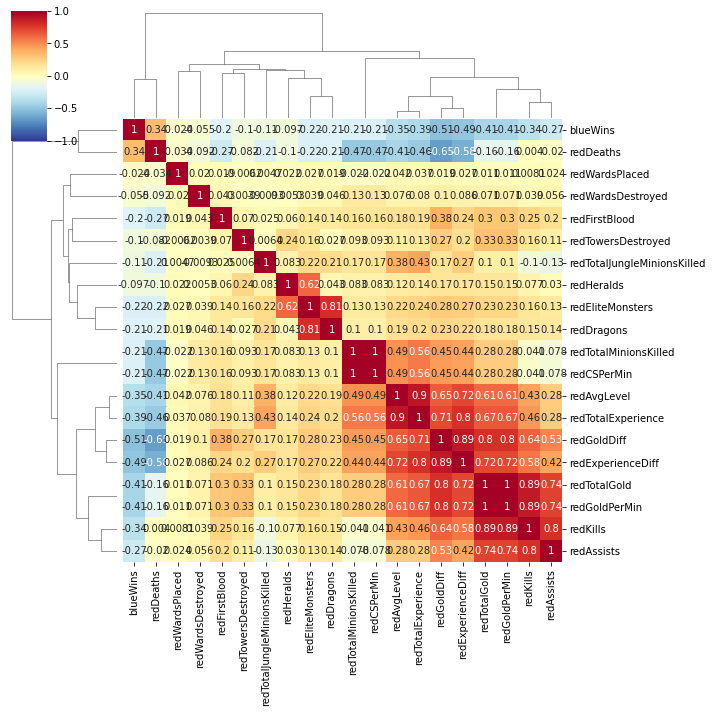

In [ ]:
sns.clustermap(red_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

### 문제 6. 각 컬럼과 승리 여부의 관계 시각화하기


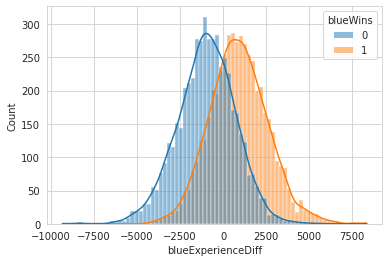

In [ ]:
# Seaborn의 countplot() 및 histplot()을 사용하여 각 컬럼과 승/패의 관계를 시각화
sns.histplot(x='blueExperienceDiff',data=df ,hue = 'blueWins',kde=True)
#경험치 총량 차이와 연관높음

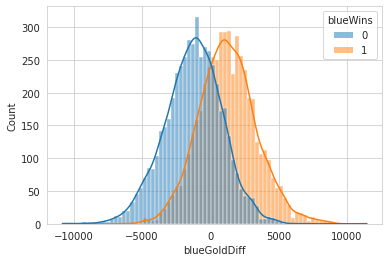

In [ ]:
sns.histplot(x='blueGoldDiff',data=df ,hue = 'blueWins',kde=True)

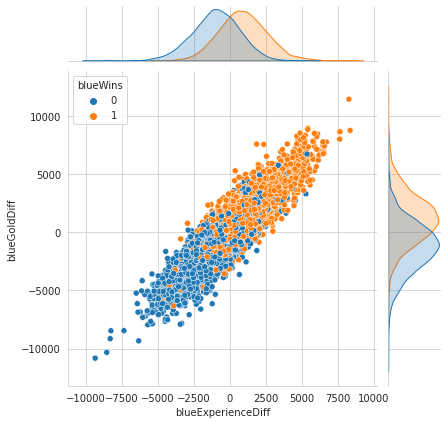

In [62]:
sns.jointplot(x='blueExperienceDiff',y='blueGoldDiff',data=df,hue='blueWins')

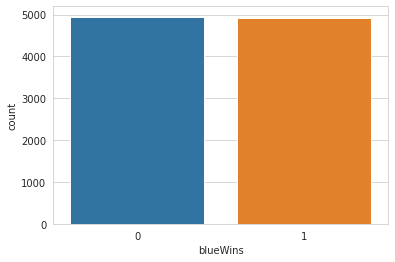

In [ ]:
# 차트 배경 설정
sns.set_style('whitegrid')

# 차트 세로로 그리기
sns.countplot(x='blueWins' ,data=df)
plt.show()

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용해 수치형 데이터 표준화하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [53]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.

X_num = df[[ 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redAssists',
       'redDragons', 'redHeralds', 
       'redTowersDestroyed',]]
scaler = StandardScaler()
scaler.fit(X_num)
scaler = scaler.transform(X_num)
X=pd.DataFrame(scaler,columns=X_num.columns)      
y = df['blueWins']

### 문제 8. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [54]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [55]:
X_train

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redFirstBlood,redAssists,redDragons,redHeralds,redTowersDestroyed
5775,-0.792989,-0.379275,0.990429,0.271042,-1.410406,-0.158724,1.327623,-0.481132,-0.210439,0.282724,0.975705,-0.453388,-0.805870,-0.990429,-1.148188,-0.838966,-0.436495,-0.198353
8906,6.310914,1.919694,0.990429,-0.061087,-0.387796,-0.896856,-0.753226,2.078430,3.881937,0.200791,0.283095,0.846967,-0.338198,-0.990429,-0.409346,1.191944,-0.436495,-0.198353
559,-0.182498,0.080519,0.990429,0.271042,0.975684,0.333364,-0.753226,-0.481132,-0.210439,0.187339,-0.386080,-0.453388,-0.338198,-0.990429,0.822058,-0.838966,-0.436495,-0.198353
2909,-0.237997,0.080519,-1.009663,-0.725346,0.634814,-1.142900,1.327623,2.078430,-0.210439,-1.029426,-1.072962,-0.290844,2.467838,1.009663,0.822058,-0.838966,-0.436495,-0.198353
2781,-0.459994,0.080519,0.990429,-0.061087,-1.751276,-0.158724,-0.753226,-0.481132,-0.210439,1.304644,1.397520,-0.615932,-0.805870,-0.990429,-1.640750,-0.838966,2.290977,-0.198353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.570992,0.080519,-1.009663,0.935301,0.293944,0.333364,1.327623,-0.481132,-0.210439,0.246853,0.093539,0.413516,-0.338198,1.009663,-0.409346,-0.838966,2.290977,-0.198353
7813,0.649991,0.540312,-1.009663,0.271042,0.293944,-0.158724,-0.753226,-0.481132,-0.210439,0.115190,0.287261,-0.290844,1.532493,1.009663,1.068338,-0.838966,-0.436495,-0.198353
905,-0.515493,-1.298863,-1.009663,-0.393216,-0.728666,-0.896856,1.327623,-0.481132,-0.210439,-0.022588,-0.507417,-0.399207,-0.805870,1.009663,-1.148188,-0.838966,-0.436495,-0.198353
5192,-0.515493,-1.298863,-1.009663,-0.393216,1.316554,0.087320,-0.753226,-0.481132,-0.210439,-2.331386,-2.775844,-0.507569,-0.805870,1.009663,1.068338,1.191944,-0.436495,-0.198353


## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [ ]:
from sklearn.linear_model import LogisticRegression

In [56]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(C=1,
                              class_weight='balanced',
                              random_state=1,
                              multi_class='ovr',
                              n_jobs=-1,
                              solver='lbfgs').fit(X_train,y_train)
print('학습결과:',model_lr.score(X_train,y_train))
print('테스트결과:',model_lr.score(X_test,y_test))


학습결과: 0.7262472885032538
테스트결과: 0.74527665317139


### 문제 10. 모델 학습 결과 평가하기


In [ ]:
from sklearn.metrics import classification_report

In [57]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))




              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1469
           1       0.75      0.75      0.75      1495

    accuracy                           0.75      2964
   macro avg       0.75      0.75      0.75      2964
weighted avg       0.75      0.75      0.75      2964



### 문제 11. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [59]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)


XGBClassifier()

### 문제 12. 모델 학습 결과 평가하기


In [60]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1469
           1       0.74      0.73      0.73      1495

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964



## Step5 모델 학습 결과 심화 분석하기


### 문제 13. Logistic Regression 모델 계수로 상관성 파악하기

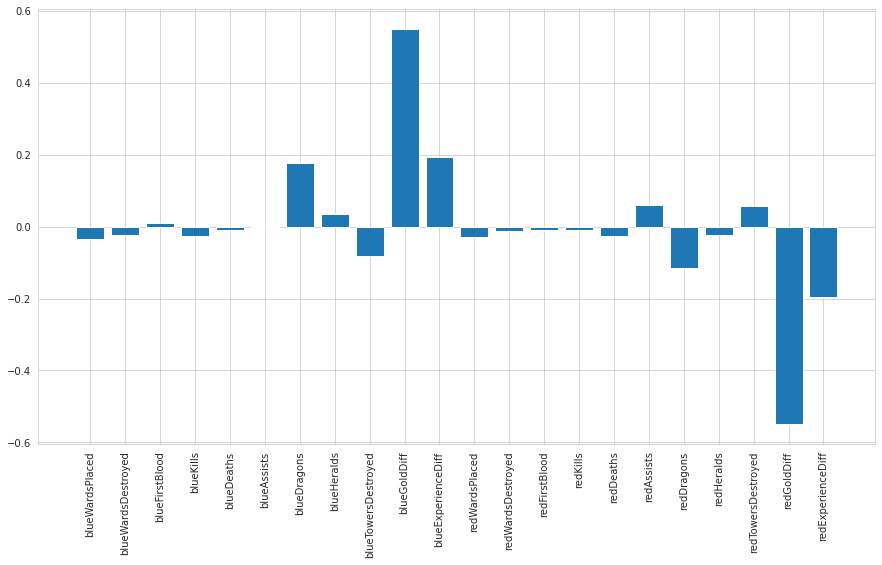

In [ ]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15,8))
plt.bar(X.columns,model_lr.coef_[0,:])
plt.xticks(rotation=90)
plt.show()






### 문제 14. XGBoost 모델로 특징의 중요도 확인하기

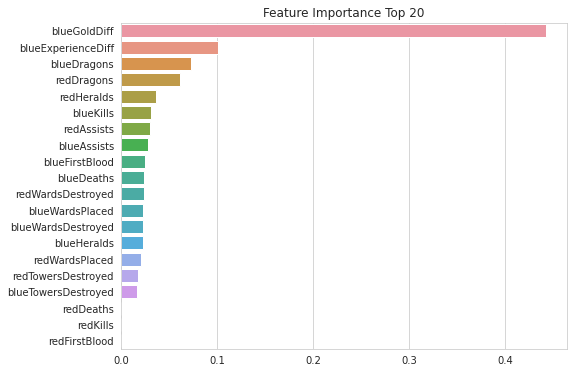

In [ ]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
ft_importance_values = model_xgb.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()


